In [1]:
import torchdeepretina as tdr
import torch
import numpy as np
import h5py
import os
import scipy.stats
import re
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator,MultipleLocator
from tqdm import tqdm
import pyret.filtertools as ft
import pandas as pd
import seaborn as sns

f2_response is unavailable until you run:
$ pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack


# Average over cells

In [2]:
df = pd.read_csv('model_indycell_performances.csv', delimiter='!')

In [3]:
df.loc[df['model_type'].isnull(),"model_type"] = "NULL"

In [4]:
df['Stimulus Type'] = "Natural Scene"
df.loc[df['stim_type']=='whitenoise', "Stimulus Type"] = "White Noise"

In [5]:
temp = df.groupby(["Stimulus Type","model_type"])['gc_cor'].agg(["mean","sem"]).reset_index()
temp

,Stimulus Type,model_type,mean,sem
0,Natural Scene,CNN,0.725583,0.018289
1,Natural Scene,CONVGC,0.712941,0.019433
2,Natural Scene,DRONE,0.689171,0.020638
3,Natural Scene,NULL,0.005191,0.009709
4,White Noise,CNN,0.721615,0.024346
5,White Noise,CONVGC,0.710187,0.024877
6,White Noise,DRONE,0.651764,0.027136
7,White Noise,NULL,0.001748,0.004489


In [6]:
lsc = 401
ratio = 0.725583/lsc
verif = 399

nat_glm = 230
nat_glm_yerr = 11
whit_glm = 251
whit_glm_yerr = 11

nat_ln = 211
nat_ln_yerr = 12
whit_ln = 231
whit_ln_yerr = 10

ceil_lsc = 381
ceil_ratio = 0.725583/ceil_lsc
nat_ceil = 418
nat_ceil_yerr = 14
whit_ceil = 432
whit_ceil_yerr = 13


In [7]:
nat_ceil_mean = nat_ceil*ceil_ratio
nat_ceil_sem = nat_ceil_yerr*ceil_ratio

In [8]:
whit_ceil_mean = whit_ceil*ceil_ratio
whit_ceil_sem = whit_ceil_yerr*ceil_ratio

In [9]:
verif*ratio

0.721964132169576

In [10]:
nat_glm_gccor = nat_glm * ratio
nat_glm_sem = nat_glm_yerr*ratio
whit_glm_gccor = whit_glm*ratio
whit_glm_sem = whit_glm_yerr*ratio

In [11]:
nat_ln_gccor = nat_ln * ratio
nat_ln_sem = nat_ln_yerr*ratio
whit_ln_gccor = whit_ln*ratio
whit_ln_sem = whit_ln_yerr*ratio

In [12]:
model_types = list(temp.loc[temp['Stimulus Type']=="Natural Scene",'model_type'])
model_types.append("GLM")
model_types.append("LN")

In [20]:
model_types

['CNN', 'CONVGC', 'DRONE', 'NULL', 'GLM', 'LN']

In [13]:
x_pos = list(range(len(model_types)))

In [14]:
nat_means = list(temp.loc[temp['Stimulus Type']=="Natural Scene",'mean'])
nat_means.append(nat_glm_gccor)
nat_means.append(nat_ln_gccor)

In [15]:
nat_sems = list(temp.loc[temp['Stimulus Type']=="Natural Scene",'sem'])
nat_sems.append(nat_glm_sem)
nat_sems.append(nat_ln_sem)

In [16]:
whit_means = list(temp.loc[temp['Stimulus Type']=="White Noise",'mean'])
whit_means.append(whit_glm_gccor)
whit_means.append(whit_ln_gccor)

In [17]:
whit_sems = list(temp.loc[temp['Stimulus Type']=="White Noise",'sem'])
whit_sems.append(whit_glm_sem)
whit_sems.append(whit_ln_sem)

In [18]:
x_pos

[0, 1, 2, 3, 4, 5]

In [21]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

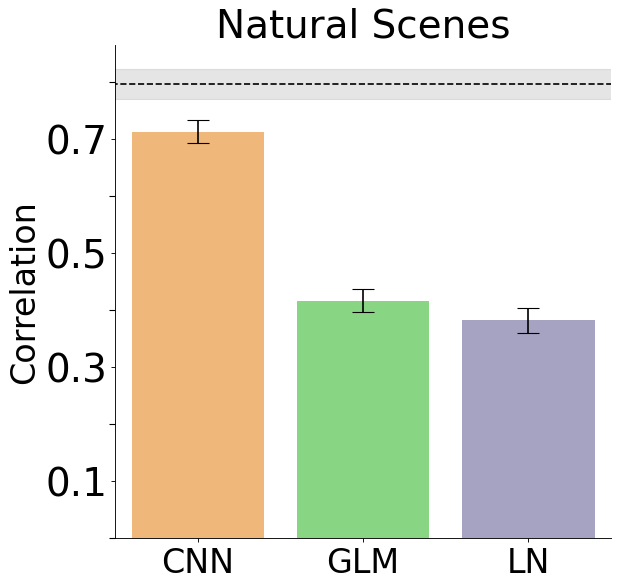

In [32]:
#colors = [sns.color_palette()[i] for i in [1,2,4]]
colors = ["#EBA557", sns.color_palette("muted")[2], "#908BB2"]
alpha = .8
temp_means = [nat_means[i] for i in [1,4,5]]
temp_sems = [nat_sems[i] for i in [1,4,5]]
temp_labels = [model_types[i] for i in [0,4,5]]
x_pos = list(range(len(temp_means)))
fig = plt.figure(figsize=(8,8),dpi=80)
ax = plt.gca()
ax.bar(x_pos, temp_means,
       yerr=temp_sems,
       align='center',
       alpha=alpha,
       color=colors,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Correlation",fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(temp_labels,fontsize=30)
ax.set_title('Natural Scenes',fontsize=35)

ax.set_yticks([.1,.3,.5,.7])
ax.yaxis.set_minor_locator(MultipleLocator(.2))

ax.tick_params(axis="y", which='major', labelsize=35)
ax.tick_params(axis='y', which='minor', length=5,width=1)

for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = True
    tic.tick2On = False
for tic in ax.yaxis.get_minor_ticks():
    tic.tick1On = True
    tic.tick2On = False


ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = np.asarray([-1]+x_pos+[x_pos[-1]+1])
y = np.asarray([nat_ceil_mean]*(2+len(x_pos)))

ax.plot(x,y,color='k',linestyle='dashed')

yerr = np.asarray([nat_ceil_sem]*(2+len(x_pos)))
ax.fill_between(x, y - yerr, y + yerr,
                 color='gray', alpha=0.2)

plt.xlim(-0.5,x_pos[-1]+.5)
# Save the figure and show
# plt.tight_layout()
plt.savefig("fig1C_naturalscenes.png", bbox_inches="tight")
plt.savefig("fig1C_naturalscenes.pdf", bbox_inches="tight")
plt.show()


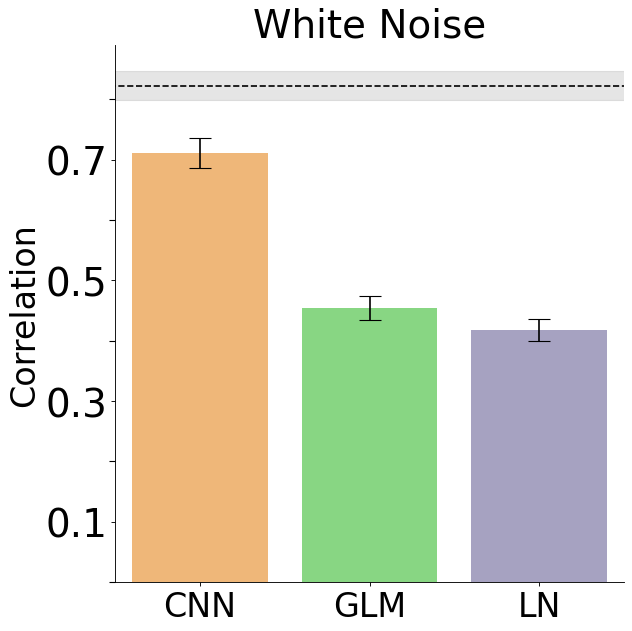

In [33]:
temp_means = [whit_means[i] for i in [1,4,5]]
temp_sems = [whit_sems[i] for i in [1,4,5]]
temp_labels = [model_types[i] for i in [0,4,5]]
x_pos = list(range(len(temp_means)))
fig = plt.figure(figsize=(8,8),dpi=80)
ax = plt.gca()
ax.bar(x_pos, temp_means,
       yerr=temp_sems,
       align='center',
       alpha=alpha,
       color=colors,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Correlation",fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(temp_labels,fontsize=30)
ax.set_title('White Noise',fontsize=35)

ax.set_yticks([.1,.3,.5,.7])
ax.yaxis.set_minor_locator(MultipleLocator(.2))

ax.tick_params(axis="y", which='major', labelsize=35)
ax.tick_params(axis='y', which='minor', length=5,width=1)

for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = True
    tic.tick2On = False
for tic in ax.yaxis.get_minor_ticks():
    tic.tick1On = True
    tic.tick2On = False


ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = np.asarray([-1]+x_pos+[x_pos[-1]+1])
y = np.asarray([whit_ceil_mean]*(2+len(x_pos)))

ax.plot(x,y,color='k',linestyle='dashed')

yerr = np.asarray([whit_ceil_sem]*(2+len(x_pos)))
ax.fill_between(x, y - yerr, y + yerr,
                 color='gray', alpha=0.2)

plt.xlim(-0.5,x_pos[-1]+.5)

# Save the figure and show
plt.tight_layout()
plt.savefig("fig1C_whitenoise.png")
plt.savefig("fig1C_whitenoise.pdf")
plt.show()


In [196]:
model_types

['CNN', 'CONVGC', 'DRONE', 'NULL', 'GLM', 'LN']

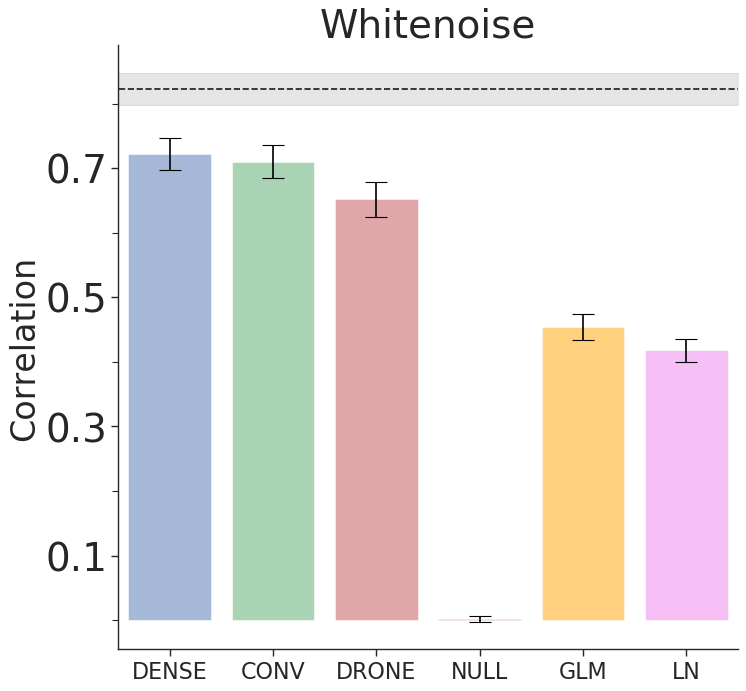

In [204]:
colors = ['b','g','r', 'brown', 'orange', 'violet']
temp_means = whit_means
temp_sems = whit_sems
temp_labels = ["DENSE", "CONV", "DRONE", "NULL", "GLM", "LN"]
x_pos = list(range(len(temp_means)))
fig = plt.figure(figsize=(10,10),dpi=80)
ax = plt.gca()
ax.bar(x_pos, temp_means,
       yerr=temp_sems,
       align='center',
       alpha=0.5,
       color=colors,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Correlation",fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(temp_labels,fontsize=20)
ax.set_title('Whitenoise',fontsize=35)

ax.set_yticks([.1,.3,.5,.7])
ax.yaxis.set_minor_locator(MultipleLocator(.2))

ax.tick_params(axis="y", which='major', labelsize=35)
ax.tick_params(axis='y', which='minor', length=5,width=1)

for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = True
    tic.tick2On = False
for tic in ax.yaxis.get_minor_ticks():
    tic.tick1On = True
    tic.tick2On = False


ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = np.asarray([-1]+x_pos+[x_pos[-1]+1])
y = np.asarray([whit_ceil_mean]*(2+len(x_pos)))

ax.plot(x,y,color='k',linestyle='dashed')

yerr = np.asarray([whit_ceil_sem]*(2+len(x_pos)))
ax.fill_between(x, y - yerr, y + yerr,
                 color='gray', alpha=0.2)

plt.xlim(-0.5,x_pos[-1]+.5)
# Save the figure and show
# plt.tight_layout()
# plt.savefig("fig1C_whituralscenes.png")
# plt.savefig("fig1C_whituralscenes.pdf")
plt.show()


In [161]:
model_types

['CNN', 'CONVGC', 'DRONE', 'NULL', 'GLM', 'LN']

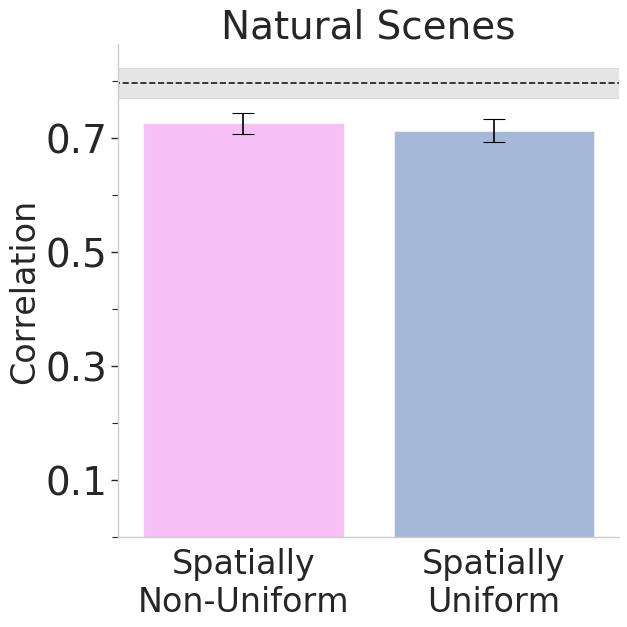

In [162]:
colors = ['violet','b']
temp_means = [nat_means[i] for i in [0,1]]
temp_sems = [nat_sems[i] for i in [0,1]]
temp_labels = ["Spatially\nNon-Uniform","Spatially\nUniform"]
x_pos = list(range(len(temp_means)))
fig = plt.figure(figsize=(8,8),dpi=80)
ax = plt.gca()
ax.bar(x_pos, temp_means,
       yerr=temp_sems,
       align='center',
       alpha=0.5,
       color=colors,
       ecolor='black',
       capsize=10)
ax.set_ylabel("Correlation",fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(temp_labels,fontsize=30)
ax.set_title('Natural Scenes',fontsize=35)

ax.set_yticks([.1,.3,.5,.7])
ax.yaxis.set_minor_locator(MultipleLocator(.2))

ax.tick_params(axis="y", which='major', labelsize=35)
ax.tick_params(axis='y', which='minor', length=5,width=1)

for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = True
    tic.tick2On = False
for tic in ax.yaxis.get_minor_ticks():
    tic.tick1On = True
    tic.tick2On = False

ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = np.asarray([-1]+x_pos+[x_pos[-1]+1])
y = np.asarray([nat_ceil_mean]*(2+len(x_pos)))

ax.plot(x,y,color='k',linestyle='dashed')

yerr = np.asarray([nat_ceil_sem]*(2+len(x_pos)))
ax.fill_between(x, y - yerr, y + yerr,
                 color='gray', alpha=0.2)

plt.xlim(-0.5,x_pos[-1]+.5)

# Save the figure and show
plt.tight_layout()
# plt.savefig("fig1C_natenoise.png")
# plt.savefig("fig1C_natenoise.pdf")
plt.show()


In [185]:
df = pd.read_csv('model_gc_performances.csv', delimiter='!')

In [188]:
df.loc[df['model_type'].isnull(),"model_type"] = "NULL"

In [189]:
df['Stimulus Type'] = "Natural Scene"
df.loc[df['stim_type']=='whitenoise', "Stimulus Type"] = "White Noise"

Text(0.5, 1, 'Ganglion Cell')

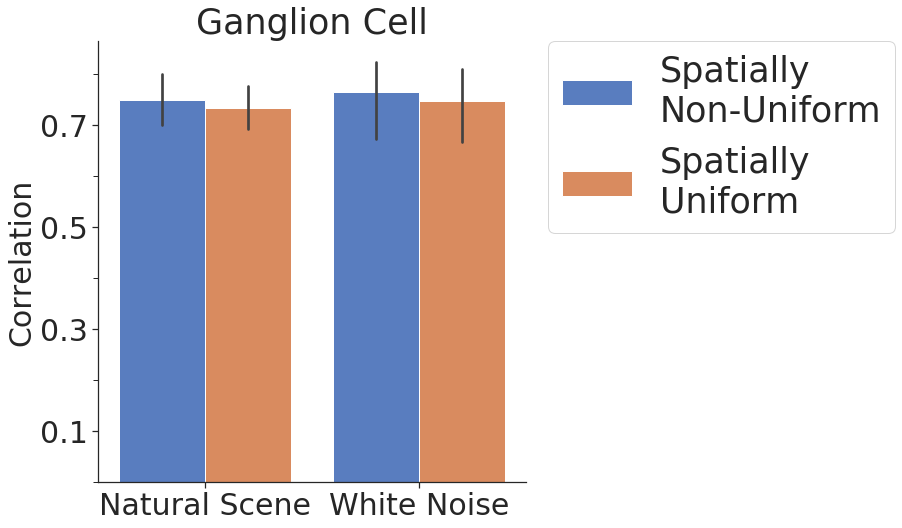

In [190]:
sns.set(style="ticks")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
df['Correlation'] = df['gc_cor']
temp = df.loc[df['model_type'].isin({"CNN","CONVGC"})]
temp['Model Type'] = temp['model_type']
temp.loc[temp['model_type']=="CNN",'Model Type'] = "Spatially\nNon-Uniform"
temp.loc[temp['model_type']=="CONVGC",'Model Type'] = "Spatially\nUniform"
g = sns.catplot(x="Stimulus Type", y="gc_cor", data=temp, hue="Model Type",
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g._legend.remove()
g.set_ylabels("Correlation",fontsize=30)
g.set_xlabels("",fontsize=1)
ax = plt.gca()
ax.grid(False)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.tick_params(axis='y', which='minor', length=5,width=1)

plt.yticks(ticks=[0.1,0.3,0.5,0.7])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=35)
plt.title("Ganglion Cell",fontsize=35)

Text(0.5, 1, 'Bipolar')

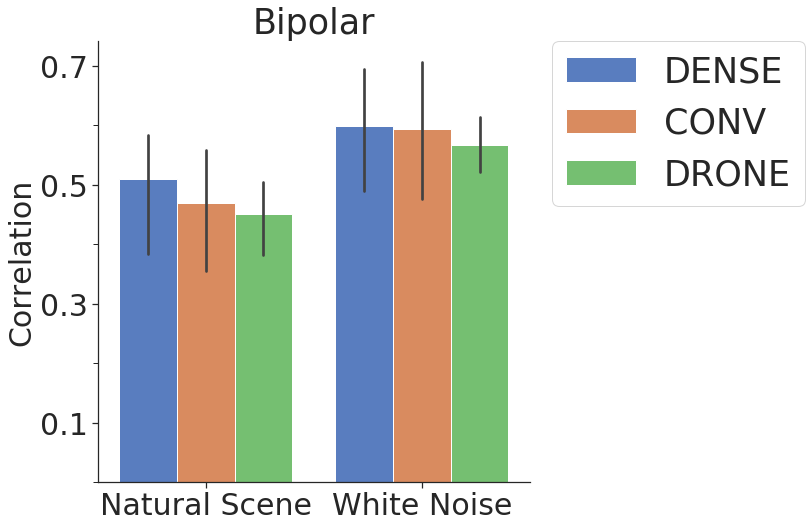

In [211]:
sns.set(style="ticks")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
df['Correlation'] = df['bip_cor']
temp = df.loc[df['model_type'].isin({"CNN","CONVGC","DRONE"})]
temp['Model Type'] = temp['model_type']
temp.loc[temp['model_type']=="CNN",'Model Type'] = "DENSE"
temp.loc[temp['model_type']=="CONVGC",'Model Type'] = "CONV"
temp = temp.sort_values(by="model_type")
g = sns.catplot(x="Stimulus Type", y="Correlation", data=temp, hue="Model Type",
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g._legend.remove()
g.set_ylabels("Correlation",fontsize=30)
g.set_xlabels("",fontsize=1)
ax = plt.gca()
ax.grid(False)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.tick_params(axis='y', which='minor', length=5,width=1)

plt.yticks(ticks=[0.1,0.3,0.5,0.7])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=35)
plt.title("Bipolar",fontsize=35)

In [ ]:
sns.set(style="ticks")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
df['Correlation'] = df['amc_cor']
temp = df.loc[df['model_type'].isin({"CNN","CONVGC","DRONE"})]
temp['Model Type'] = temp['model_type']
temp.loc[temp['model_type']=="CNN",'Model Type'] = "DENSE"
temp.loc[temp['model_type']=="CONVGC",'Model Type'] = "CONV"
temp = temp.sort_values(by="model_type")
g = sns.catplot(x="Stimulus Type", y="Correlation", data=temp, hue="Model Type",
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g._legend.remove()
g.set_ylabels("Correlation",fontsize=30)
g.set_xlabels("",fontsize=1)
ax = plt.gca()
ax.grid(False)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.tick_params(axis='y', which='minor', length=5,width=1)

plt.yticks(ticks=[0.1,0.3,0.5,0.7])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=35)
plt.title("Amacrine",fontsize=35)

Text(0.5, 1, 'Unknown')

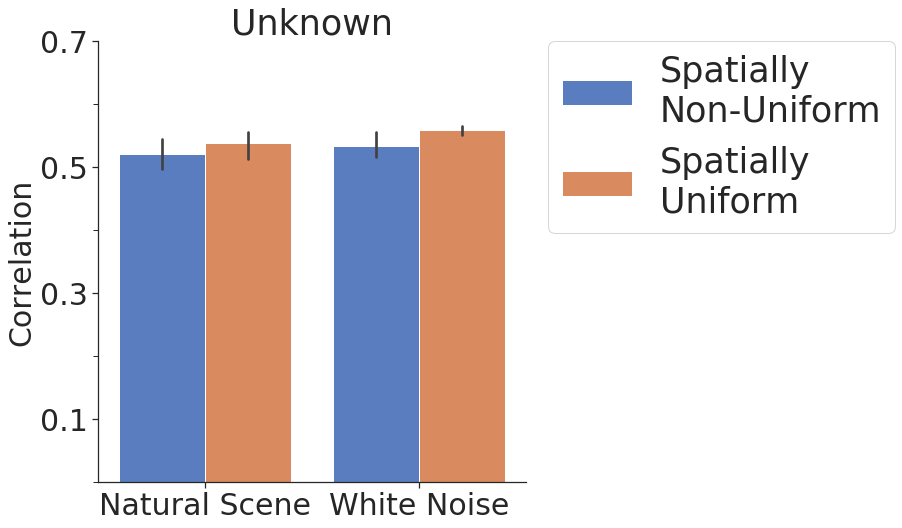

In [195]:
sns.set(style="ticks")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
df['Correlation'] = df['unk_cor']
temp = df.loc[df['model_type'].isin({"CNN","CONVGC"})]
temp['Model Type'] = temp['model_type']
temp.loc[temp['model_type']=="CNN",'Model Type'] = "Spatially\nNon-Uniform"
temp.loc[temp['model_type']=="CONVGC",'Model Type'] = "Spatially\nUniform"
g = sns.catplot(x="Stimulus Type", y="Correlation", data=temp, hue="Model Type",
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g._legend.remove()
g.set_ylabels("Correlation",fontsize=30)
g.set_xlabels("",fontsize=1)
ax = plt.gca()
ax.grid(False)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.tick_params(axis='y', which='minor', length=5,width=1)

plt.yticks(ticks=[0.1,0.3,0.5,0.7])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=35)
plt.title("Unknown",fontsize=35)

# Average over models

In [7]:
df = pd.read_csv("model_gc_performances.csv",delimiter="!")

In [8]:
df.loc[df['model_type'].isnull(),"model_type"] = "NULL"
df.loc[df['model_type']=="CNN", "model_type"] = "LSC Model"
df.loc[df['model_type']=="DRONE", "model_type"] = "Conv Model"

In [9]:
df['datatype'] = "Natural Scenes"
df.loc[df['stim_type']=='whitenoise', "datatype"] = "White Noise"

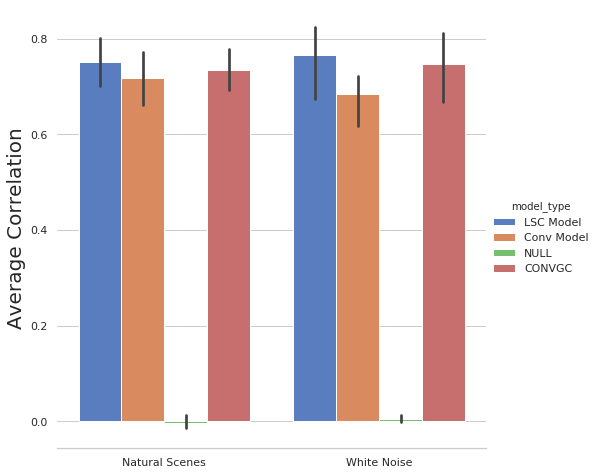

In [10]:
sns.set(style="whitegrid")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="datatype", y="gc_cor", data=df, hue="model_type",
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Average Correlation",fontsize=20)
g.set_xlabels("",fontsize=1)
plt.savefig("fig1C.eps")

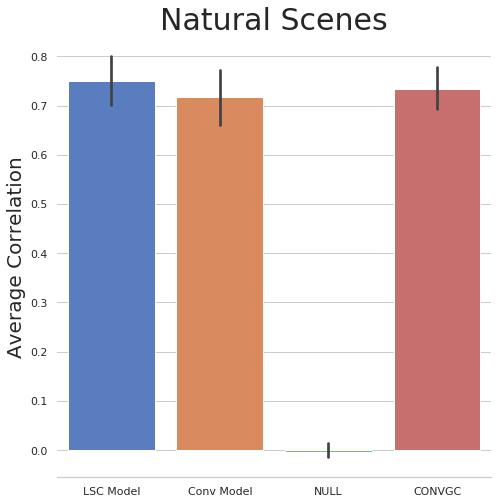

In [11]:
sns.set(style="whitegrid")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="model_type", y="gc_cor", data=df.loc[df['stim_type']=="naturalscene",:],
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Average Correlation",fontsize=20)
g.set_xlabels("")
plt.title("Natural Scenes",fontsize=30)
plt.savefig("fig1C_naturalscene.png")

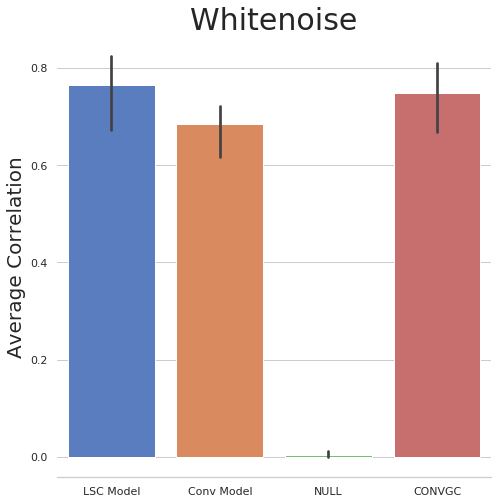

In [12]:
sns.set(style="whitegrid")
# plt.style.use("../deepretina.mplstyle")
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="model_type", y="gc_cor", data=df.loc[df['stim_type']=="whitenoise",:],
                height=7, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Average Correlation",fontsize=20)
g.set_xlabels("")
plt.title("Whitenoise",fontsize=30)
plt.savefig("fig1C_whitenoise.png")